<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# Recitation 8: Bayesian and Frequentist Statistics

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">
## 8.0 Overview of Learning Objectives:

In this recitation we will explore the following objectives:

-Understand the basis for Bayes' theorem

-Discuss how it fits into more general Bayesian statistics and its difference from frequentists' perspective

-Look at examples of applying Bayes' theorem

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 8.0 Bayes' Theorem

Bayes' Theorem is defined as the following and contains a few working parts to discuss:<br><br>
\begin{equation}
P(A|B)=\frac{P(A) \cdot P(B|A)}{P(B)}
\end{equation}

* $P(A|B)$, the probability of $A$ happening if $B$ is true, known as the "posterior" probability
* $P(A)$, the probability of $B$ happening, known as the "prior" probability of $A$
* $P(B|A)$, the probability of $B$ happening if $A$ is true, also known as the likelihood
* $P(B)$, probability of whether $B$ would have happened regardless of $A$

<br><br>
Usually $P(B)$ is just treated as a normalizing factor, and since we need other hypothesis for comparison in order to measure $P(B)$, this is often ommited from the expression and we often just quote:
\begin{equation*}
P(A|B)\propto P(A)\cdot P(B|A)
\end{equation*}

Often outside of the more general events $A$ and $B$ in this course we will more often use
\begin{equation*}
P(M|D)\propto P(M)\cdot P(D|M)
\end{equation*}
Where $D$ is the data in question and $M$ is the model we are attempting to apply to the observed data.

# <!--start-block-->
<hr style="height: 1px;">

## 8.1 Frequentist vs. Bayesian Picture
Let's take an example from flipping a coin. We don't know if it's a fair coin (equal probability for heads or tails) or an unfair coin (unequal probability for heads vs tails). We'll refer to the probability for heads and tails respectively here as $P(H)$ and $P(T)$.<br><br>

After flipping the coin 20 times we obtain heads 15 times.

### Frequentist Picture

For the frequentist, they will analyze the data by seeing that we have $P(H)=3/4$, therefore we must have an unfair coin!

### Bayesian Picture

For the Bayesian statistician, they would be a little uncomfortable with this conclusion. Instead of stating that our parameter $p=P(H)$ is some fixed quantity that should be clear from our data, the Bayesian states that $p(H)$ is a random variable. <br><br>
In this case our parameter $p=P(H)$ corresponds to our prior $P(M)$. Since the Bayesian picture states that $p$ should be some random variable, let us assume a uniform prior $P(p)=P(M)=1$. Using Bayes' equation we now have:<br><br>
\begin{gather*}
P(p|D)\propto P(p)\cdot P(D|p)= \frac{N!}{m!(N-m)!}(1-p)^{N-m} p^{m}
\end{gather*}<br><br>
This follows from the fact that $P(D|p)$, the probability that we get heads $m$ out of $N$ times based on the probability $p$, should follow a binomial distribution. We can use this to plot out the probability distribution for $p$ for given values of $N$ and $m$ using python:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from scipy.signal import peak_widths

def with_uniform_prior(p,N,m):
    return comb(N,m)*np.power(p,m)*np.power(1-p,N-m)


<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span> 

Using the function above, plot out the probability distribution of $p$ for $N=20,$ $m=15$.

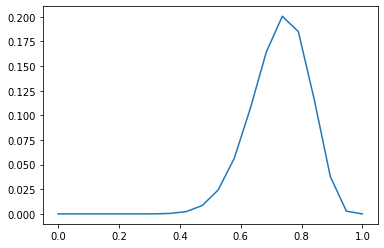

In [3]:
p = np.linspace(0,1,20)
N = 20
m = 15
plt.plot(p, with_uniform_prior(p,N,m))
plt.show()

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span> 

Using your script from the first exercise, plot the probability distributions for $p$ for the values:
* $N$=100, $m$=75
* $N$=4, $m$=3

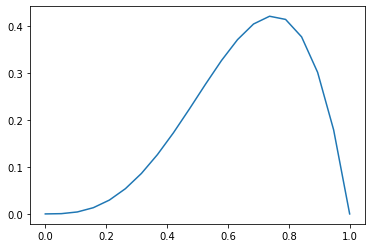

In [4]:
p = np.linspace(0,1,20)
N = 4
m = 3
plt.plot(p, with_uniform_prior(p,N,m))
plt.show()

<!--start-block-->
<hr style="height: 1px;"> <br>

## 8.2 A New Prior




Let's change our prior assumptions and retackle this same coin flipping situation.<br><br>
Let's instead approach this with the assumption that it's very rare for a coin to be unfair and that we're 99% sure we're dealing with a normal coin. We can model this as a Gaussian with a mean at $p=0.5$ and $\sigma=0.01$.<br><br>

We now change our prior a bit to represent our new assumptions:
\begin{gather*}
P(p)=0.99\cdot \frac{1}{\sqrt{2\pi}\cdot 0.01}\exp\left(-\frac{1}{2}\frac{(p-0.5)^2}{(0.01)^2}\right)+0.01
\end{gather*}

As before we can plot out how this affects our distribution for $p$ with the following function:

In [5]:
def with_new_prior(p,N,m):
    prior = 0.99 / (0.01 * np.sqrt(2*np.pi)) * np.exp(-(p-0.5)**2/(2*0.01**2))+0.01
    return prior*with_uniform_prior(p,N,m)

<!--start-block-->
#### <span style="color:#BA2220">>>>EXERCISE</span> 

Using the new prior, redo the distributions for $p$ for the following values of $N$ and $m$:
* $N=20$, $m=15$
* $N=3$, $m=3$
* $N=100$, $m=75$

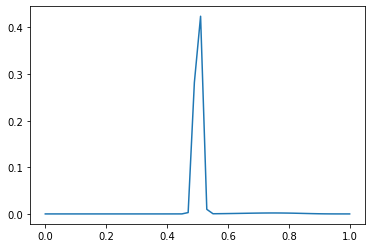

In [15]:
p = np.linspace(0,1,50)
N = 20
m = 15
plt.plot(p, with_new_prior(p,N,m))
plt.show()

<!--start-block-->
<hr style="height: 1px;"> <br>

## 8.3 Conclusions

As we have seen, the conclusions from Bayesian perspectives all depend on your choice of prior when approaching the situation, i.e. whether we assumed that the coin was likely unfair or not.<br><br>

This isn't necessarily a bad thing, it allows us to build on our observations by applying things we know or suspect. There is the counter to this as we observed that if our prior significantly changes our answer then our data isn't very constrained by our model. <br><br>

Our exploration of the difference between the frequentist and Bayesian analysis should not leave you with the idea that one is much better or accurate than the other, both are powerful tools for data analysis that have different cases for optimal use.